In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from pathlib import Path

def compute_classical_energy(u, eps, h):
    """Compute the discrete energy :

    Parameters
    ----------
    u : 2D-array
        The numerical solution of u.
    eps : float
        The diffusion coefficient.
    h : float
        The mesh size of x and y direction.

    Returns
    -------
    float
        The discrete energy of u.
        
    """
    
    ux = np.gradient(u)/h
    term1 = np.sum((eps**2 / 2.0) * (ux**2))
    term2 = np.sum(((1 - u ** 2) ** 2) / 4)
    return h * (term1 + term2)

In [4]:
m1 = np.log(1.682542)/np.log(2.227860)
k1 = (0.1-m1*0.3)/(1-m1)
print(k1)

m2 = np.log(2.227860)/np.log(2.493543)
k2 = (0.3-m2*0.5)/(1-m2)
print(k1)
print(1/(4.710)**(-0.2706-0.1))

-0.2706729667308615
-0.2706729667308615
1.77591243496084


In [26]:
signType = 'negative'

rootPath = Path('./data/') / initialName

dataPath = [folder for folder in (rootPath/'positive').iterdir() \
            if not folder.name[0].startswith('.')] + \
            [folder for folder in (rootPath/'negative').iterdir() \
            if not folder.name[0].startswith('.')]

print(dataPath[0].parents[0].name)

positive


In [59]:
diff_t = np.linspace(0.005 ,3000,3000) * 0.005
energy_t = np.linspace(0 ,3000,3001) * 0.005
print(np.tile(energy_t,(6,1)).T.shape)

(3001, 6)


In [11]:
initialName = 'coarsening'

method = 'GL'

rootPath = Path('./data/') / initialName

dataPath = [folder for folder in (rootPath/'positive').iterdir() \
            if not folder.name[0].startswith('.')] + \
            [folder for folder in (rootPath/'negative').iterdir() \
            if not folder.name[0].startswith('.')]

alpha_list = [0.1 , 0.3 , 0.5, 0.7, 0.9, 1]

# alpha_list = [0.5, 0.7, 0.9, 1]

# alpha_list = [1]

# fig = plt.figure(figsize=(10,5))


neg_peaks_mean_dict = {}
pos_peaks_mean_dict = {}
    
idx_contour = [750, 1500, 2250, 3000]
# idx_contour = [1000]

L = 10
eps = 0.1
diff_t = np.linspace(0.005 ,3000,3000) * 0.005
energy_t = np.linspace(0 ,3000,3001) * 0.005
Nx = 2**7
x = np.linspace(-L/2, L/2, Nx)[:-1]
y = np.linspace(-L/2, L/2, Nx)[:-1]

X, Y = np.meshgrid(x, y)

for alpha in alpha_list:
    print(alpha)
    pos_peakpoints = []
    neg_peakpoints = []
    for folder in dataPath:
        data_dict = {}
        signType = folder.parents[0].name

        if alpha == 1:
            u_hist = np.load(folder / f'L1_{alpha}_{initialName}.npy')
        else:
            u_hist = np.load(folder / f'{method}_{alpha}_{initialName}.npy')

    #         MassDiff = [np.sum(diff) for diff in np.diff(u_hist, axis=0)]

    #         if signType == 'negative':
    #             detectedPeaks, _ = find_peaks(-np.array(MassDiff))
    #         elif signType == 'positive':
    #             detectedPeaks, _ = find_peaks(np.array(MassDiff))

    #         if detectedPeaks[0] < 100:
    #             firstPeak = detectedPeaks[1]
    #         else:
    #             firstPeak = detectedPeaks[0]

        MassDiff = np.array([np.sum(diff) for diff in np.diff(u_hist, axis=0)])
        max_index = np.argmax(np.abs(MassDiff))
        max_value = MassDiff[max_index]

    #         peakpoints.append((firstPeak, MassDiff[firstPeak]))
        if signType == 'positive':
            pos_peakpoints.append((max_index, max_value))
        elif signType == 'negative':
            neg_peakpoints.append((max_index, max_value))



    pos_peaks_mean_dict[alpha] = np.array(pos_peakpoints).mean(0)
    neg_peaks_mean_dict[alpha] = np.array(neg_peakpoints).mean(0)
        
#         data_dict[alpha] = u_hist
        
#     for idx in idx_contour:
#         for alpha in alpha_list:
#             plt.figure(figsize=(12,5))
#             plt.contourf(X,Y, np.reshape(data_dict[alpha][idx], (Nx-1,Nx-1)), cmap="turbo", levels=np.linspace(-1,1,100))
#             plt.colorbar()
#             plt.title(fr'$T=${idx*0.005} Using {method} with $\alpha$={alpha} ', fontsize=20)
#             plt.xlabel('x')
#             plt.ylabel('y')
#             figPath = folder / f'{method}_{signType}_conttour_{idx}_{alpha}.png'
#             plt.savefig(figPath)
#             plt.close('all')
        
#     DifferenceMass = []
#     for alpha in alpha_list:
#         mass = [np.sum(_) for _ in np.diff(data_dict[alpha], axis=0)]
#         DifferenceMass.append(mass)
        
#     DifferenceMass = np.column_stack(DifferenceMass)

#     # save fig
#     plt.figure(figsize=(12,5))
#     plt.title(r'Total mass of $U_{k+1}-U_k$' + f'by {method}')
#     plt.xlabel('t')
#     plt.ylabel(r'$\mathbf{1}^T(U_{k+1}-U_k)$')
#     plt.plot(np.tile(diff_t, (6, 1)).T, DifferenceMass)
#     plt.legend([rf"$\alpha=${alpha}" for alpha in alpha_list])
    
#     figPath = folder / f'{method}_{signType}_sumDiff.png'
#     plt.savefig(figPath)
#     plt.close('all')
    
#     EnergyList = []
#     for alpha in alpha_list:
#         energy = [compute_classical_energy(u, 0.1, 10/(2**7-1)) for u in data_dict[alpha]]
#         EnergyList.append(energy)
        
#     EnergyList = np.column_stack(EnergyList)
#     # save fig
#     plt.figure(figsize=(12,5))
#     plt.title(fr'Energy by different $\alpha$ using {method}')
#     plt.xlabel('t')
#     plt.ylabel(r'$E[U_k]$')
#     plt.plot(np.tile(energy_t, (6, 1)).T, EnergyList)
#     plt.legend([rf"$\alpha=${alpha}" for alpha in alpha_list])
    
#     figPath = folder / f'{method}_{signType}_energy.png'
#     plt.savefig(figPath)
#     plt.close('all')
    

0.1
0.3
0.5
0.7
0.9
1


In [5]:
MassDiff = [np.sum(diff) for diff in np.diff(a, axis=0)]

NameError: name 'a' is not defined

In [100]:
np.array(peakpoints).mean(0)

array([1219.11764706,   -2.58648099])

In [63]:
pos_peaks_mean_dict

{0.1: array([992.        ,   1.41329197]),
 0.3: array([1116.        ,    1.57815349]),
 0.5: array([1070.        ,    1.38637301]),
 0.7: array([1062.        ,    1.32158798]),
 0.9: array([1077.        ,    1.32628021]),
 1: array([1088.        ,    1.34387104])}

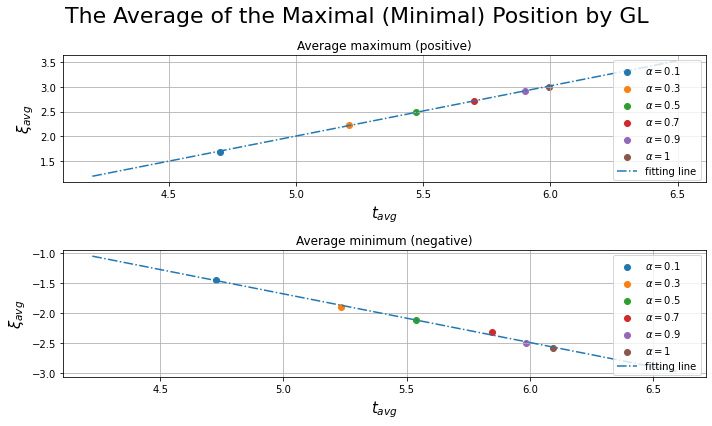

pos [ 1.01351146 -3.06293401]
neg [-0.80928028  2.36656541]


In [12]:
pos_peaks = np.array(list(pos_peaks_mean_dict.values()))
neg_peaks = np.array(list(neg_peaks_mean_dict.values()))
pos_peaks[:,0] = pos_peaks[:,0].astype(int)*0.005
neg_peaks[:,0] = neg_peaks[:,0].astype(int)*0.005
pos_x = pos_peaks[:,0]
pos_y = pos_peaks[:,1]
neg_x = neg_peaks[:,0]
neg_y = neg_peaks[:,1]

pos_fit = np.polyfit(pos_x, pos_y, 1)
neg_fit = np.polyfit(neg_x, neg_y, 1)

pos_poly = np.poly1d(pos_fit)
neg_poly = np.poly1d(neg_fit)

pos_xp = np.linspace(pos_peaks[0,0]-0.5, pos_peaks[-1,0]+0.5, 100)
neg_xp = np.linspace(neg_peaks[0,0]-0.5, neg_peaks[-1,0]+0.5, 100)

fig, ax = plt.subplots(2, figsize=(10, 6))

for alpha, point in pos_peaks_mean_dict.items():
    ax[0].scatter(int(point[0])*0.005, point[1])
    ax[0].legend([rf'$\alpha=${alpha}' for alpha in alpha_list])
    ax[0].set_title(f'Average maximum (positive)')
    ax[0].set_xlabel(r'$t_{avg}$', fontsize=15)
    ax[0].set_ylabel(r'$\xi_{avg}$', fontsize=15)
    ax[0].grid(True)

for alpha, point in neg_peaks_mean_dict.items():
    ax[1].scatter(int(point[0])*0.005, point[1])
    ax[1].set_title(f'Average minimum (negative)')
    ax[1].set_xlabel(r'$t_{avg}$', fontsize=15)
    ax[1].set_ylabel(r'$\xi_{avg}$', fontsize=15)
    ax[1].grid(True)

# plt.legend([rf'$\alpha=${alpha}' for alpha in alpha_list])
# plt.title(f'mean peak points ({signType})')
# plt.xlabel('k')
# plt.ylabel(r'$\mathbf{1}^T(U_{k+1}-U_k)$')
# plt.grid()
ax[0].plot(pos_xp, pos_poly(pos_xp), '-.')
ax[1].plot(neg_xp, neg_poly(neg_xp), '-.')

ax[1].legend([rf'$\alpha=${alpha}' for alpha in alpha_list]+['fitting line'])
ax[0].legend([rf'$\alpha=${alpha}' for alpha in alpha_list]+['fitting line'])

plt.suptitle('The Average of the Maximal (Minimal) Position by GL', fontsize=22)

fig.tight_layout()
plt.show()

print("pos", pos_fit)
print("neg", neg_fit)

[ 1.01947203 -3.10793321]
[-0.81370398  2.40113738]


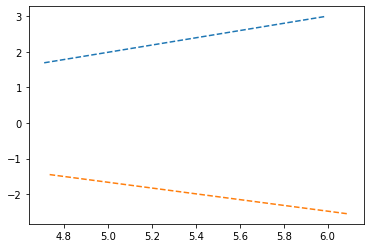

In [106]:
pos_peaks = np.array(list(pos_peaks_mean_dict.values()))
neg_peaks = np.array(list(neg_peaks_mean_dict.values()))
pos_peaks[:,0] = pos_peaks[:,0].astype(int)*0.005
neg_peaks[:,0] = neg_peaks[:,0].astype(int)*0.005
pos_x = pos_peaks[:,0]
pos_y = pos_peaks[:,1]
neg_x = neg_peaks[:,0]
neg_y = neg_peaks[:,1]

pos_fit = np.polyfit(pos_x, pos_y, 1)
neg_fit = np.polyfit(neg_x, neg_y, 1)

pos_poly = np.poly1d(pos_fit)
neg_poly = np.poly1d(neg_fit)

pos_xp = np.linspace(pos_peaks[0,0], pos_peaks[-1,0], 100)
neg_xp = np.linspace(neg_peaks[0,0], neg_peaks[-1,0], 100)
plt.plot(pos_xp, pos_poly(pos_xp), '--')
plt.plot(neg_xp, neg_poly(neg_xp), '--')
print(pos_fit)
print(neg_fit)

In [14]:
import pandas as pd
pos_df = pd.DataFrame(pos_peaks)
print(pos_df.to_latex())

\begin{tabular}{lrr}
\toprule
{} &      0 &         1 \\
\midrule
0 &  4.700 &  1.685141 \\
1 &  5.210 &  2.232092 \\
2 &  5.470 &  2.497927 \\
3 &  5.700 &  2.714867 \\
4 &  5.900 &  2.910075 \\
5 &  5.995 &  3.002835 \\
\bottomrule
\end{tabular}



C:\Users\user\AppData\Local\Temp\ipykernel_11828\1614838742.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pos_df.to_latex())


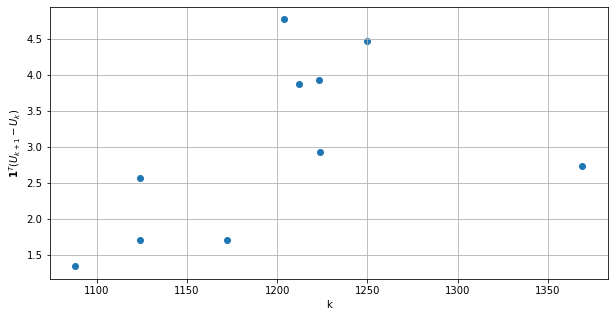

In [29]:
fig = plt.figure(figsize=(10,5))
plt.scatter(*zip(*peakpoints))
plt.grid()
plt.xlabel('k')
plt.ylabel(r'$\mathbf{1}^T(U_{k+1}-U_k)$')
plt.show()

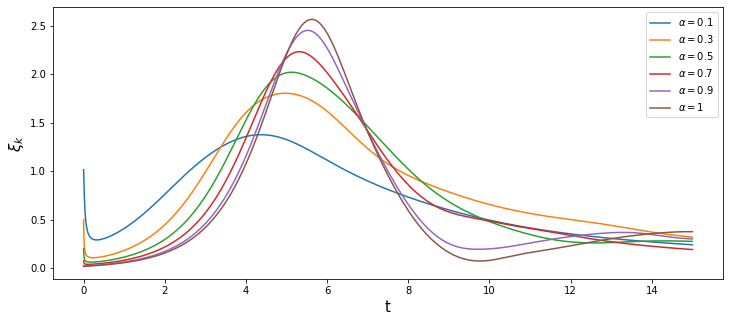

In [27]:
signType = 'positive'
# signType = 'negative'
method = 'L1'

rootPath = Path('./data/') / initialName / signType / '1687481457.1038098'
data_dict = {}

for alpha in alpha_list:
    u_hist = np.load(rootPath / f'L1_{alpha}_{initialName}.npy')
    data_dict[alpha] = u_hist

DifferenceMass = []
for alpha in alpha_list:
    mass = [np.sum(_) for _ in np.diff(data_dict[alpha], axis=0)]
    DifferenceMass.append(mass)

DifferenceMass = np.column_stack(DifferenceMass)

# save fig
plt.figure(figsize=(12,5))
# plt.title(r)
plt.xlabel('t', fontsize=15)
plt.ylabel(r'$\xi_k$', fontsize= 15)
plt.plot(np.tile(diff_t, (6, 1)).T, DifferenceMass)
plt.legend([rf"$\alpha=${alpha}" for alpha in alpha_list])

figPath = rootPath / f'{method}_{signType}_sumDiff.png'
plt.savefig(figPath)
plt.show()
plt.close('all')